# 2.2 - Linear Predictive Coding

<img style="float: right; margin:5px 0px 0px 10px" src="img/2-title.jpg" width="500">
Die lineare Vorhersagecodierung (LPC) ist ein Verfahren, das hauptsächlich in der Audiosignalverarbeitung und Sprachverarbeitung verwendet wird, um die Spektralhüllkurve eines digitalen Sprachsignals in komprimierter Form unter Verwendung der Informationen eines linearen Vorhersagemodells darzustellen. Es ist eine der leistungsstärksten Sprachanalysetechniken und eine der nützlichsten Methoden zum Codieren von Sprache guter Qualität mit einer niedrigen Bitrate und liefert hochgenaue Schätzungen von Sprachparametern. LPC ist die am weitesten verbreitete Methode in der Sprachcodierung und Sprachsynthese.

## Inhalt  
<table style="width:256px; border: 1px solid black; display: inline-block">
    <tr>
        <td style="text-align:right"><img src="img/2-1.png" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#1'>
                1. Grundlagen
            </a>
        </td>
    </tr>    
    <tr>
        <td  style="text-align:right" width=64px><img src="img/2-2.png" style="float:left"></td>
        <td style="text-align:left" width=256px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#2'>
                2. Anwendungsbeispiel
            </a>
        </td>
    </tr>  
</table>

----

<a id='1'></a>
<div>
    <img src="img/2-1.png" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        1. Grundlagen
    </h2>
</div>

<img style="float:top; margin:5px 0px 0px 10px" src="img/Quelle-Filter-Modell.jpg" width="800">

Die Quell-Filter-Sprachsynthese basiert auf einer akustischen Theorie, die glaubt, dass Schall durch Anregung und entsprechende Filter gebildet wird.   

Die Sprache wird von unserem Soundsystem erzeugt, das mit einer einfachen Schallquelle und einem Kanalmodell simuliert werden kann. Die Schallquelle wird von den Stimmbändern erzeugt. Die Stimmbänder liefern Erregungssignale für den Soundtrack. Diese Erregung kann periodisch oder nicht periodisch sein. Wenn sich die Stimmbänder in einem vokalisierten Zustand befinden (Vibration), werden Stimmgeräusche (zum Beispiel Vokale) erzeugt, wenn sich die Stimmbänder in einem stillen Zustand befinden, werden stille Geräusche (zum Beispiel Konsonanten) erzeugt. Der Kanal kann als Filter betrachtet werden, der das Spektrum des Anregungssignals von den Stimmbändern umformen kann, um verschiedene Klänge zu erzeugen. 

Bei der quellfilterbasierten Parametersynthese kann der Synthesizer-Workflow in drei Schritte unterteilt werden:

- die entsprechende Glottalwellen-Anregungsquelle gemäß den tonalen Eigenschaften der zu synthetisierenden Silbe konstruieren  
- ein neues Vokaltrakt-Parametermodell auf der Grundlage des ursprünglichen Vokaltrakts auf der Grundlage der Schalländerungsinformationen wie Koartikulation und Geschwindigkeitsänderung (Dauerparameter) erstellen  
- die Glottalwellen-Anregungsquelle an das neue Vokaltraktmodell senden, die Ausgabe ist die synthetisierte Sprache, die die gegebenen prosodischen Eigenschaften erfüllt

LPC ist die auf diesem Modell basierende Sprachgenerierungstechnologie. In diesem Modell wird das Sprachsignal durch ein Anregungssignal durch ein zeitvariables Allpolfilter erzeugt. Der Koeffizient des Allpolfilters hängt von der Kanalform des spezifischen erzeugten Klangs ab. Das Anregungssignal ist entweder eine Impulsfolge von stimmhafter Sprache oder zufälliges Rauschen von leisem Ton. 

#### Grundidee:   
Die Grundidee der LPC ist, der aktuelle Wert einer Sprachprobe kann durch eine gewichtete lineare Kombination der vergangenen Werte mehrerer Sprachproben angenähert werden. Die Gewichtungskoeffizienten in der linearen Kombination werden Prädiktor-Koeffizienten genannt. Indem die Summe der Quadrate der Differenzen zwischen den tatsächlichen Sprachabtastwerten und den linearen Vorhersageabtastwerten auf ein Minimum reduziert wird, kann ein eindeutiger Satz von Prädiktor-Koeffizienten bestimmt werden.

Die Abtastwerte eines Signals $y(k)$, die durch lineare Filterung eines (unbekannten) Eingangssignals entstanden sind, sind nicht vollständig unabhängig voneinander. Statt dessen lässt sich jeder Abtastwert $y(k)$ aus endlich vielen vorangegangenen Abtastwerten durch folgende Prädiktorgleichung annähern:
\begin{equation}
\hat{y}(k)=\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Für jeden Abtastwert wird damit ein gewisser Prädiktionsfehler $e(k)$ gemacht:
\begin{equation}
e(k)=y(k)-\hat{y}(k)=y(k)-\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Die $a_{i}$ werden geschätzt, indem der mittlere quadratische Fehler im betrachteten Signalabschnitt minimiert wird.
Bei der Analyse werden die Koeffizienten $a_{i}$ derart bestimmt, dass die Summe der Prädiktionsfehlerquadrate innerhalb eines endlichen Zeitfensters der Länge $L$ minimal wird.  

Die Gleichung für $y(k)$ entspricht formal der Rekursionsgleichung für einen IIR-Allpol-Filter $H(z)$, wobei das Fehlersignal als (mit der Verstärkung $G$ skaliertes) Eingangssignal $x(k)$ betrachtet werden kann:
\begin{equation}
y(k)=e(k)+\sum_{i=1}^{N}a_{i}y(k-i)=Gx(k)+\sum_{i=1}^{N}a_{i}y(k-i)
\end{equation}

Die Systemfunktion ist somit
\begin{equation}
H(z)=\frac{Y(z)}{E(z)}=\frac{1}{1-\sum_{i=1}^{N}a_{i}z^{-i}}
\end{equation}

Dieser Filter ist sogenannter __LPC-Synthesefilter__. Der Amplitudengang des Synthesefilters entspricht bei einem weißen Anregungsspektrum der
Hüllkurve im Frequenzbereich.

Umgekehrt lässt sich das Fehlersignal $e(k)$ durch die Filterung von $y(k)$ mit dem inversen Filter $A(z) = 1/H(z)$ bestimmen. Dieser Filter wird als __Analysefilter__ bezeichnet.

<img style="float:top; margin:5px 0px 0px 10px" src="img/lpc.png" width="800">

----

<a id='2'></a>
<div>
    <img src="img/2-2.png" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        2.  Anwendungsbeispiel
    </h2>
</div>

Konstruieren Sie nach obenen Theorien ein Prädiktfilter für das Audiosignal vom Pfad "data/akustik.wav", das den mittleren quadratischen Vorhersagefehler minimiert, um den Codierer und Decodierer eines Audiosignalkanals zu implementieren.

In [7]:
# Packages importieren
from scipy.io import wavfile
from librosa import lpc
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
import scipy.signal as sgn

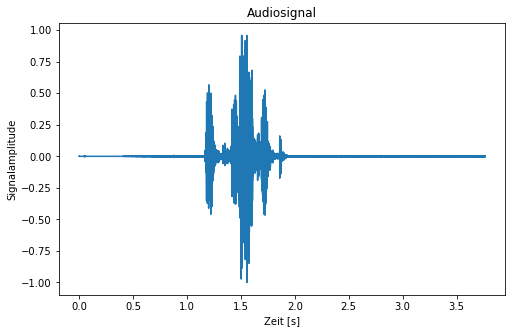

In [2]:
'''
Aufgabe (Wiederholen): Signal einlesen, abspielen, visualisieren
'''
# Audiosignal einlesen
fs_Hz, audioSignal = wavfile.read('data/akustik.wav')  # Sample Rate, Audiosignal im Array-Form

# Abspielen
play_obj = sa.play_buffer(audioSignal, 1, 2, fs_Hz)
play_obj.wait_done()

# Normalisieren
audioSignal = audioSignal/np.max(np.abs(audioSignal))  

# Signalparameter:
signalLength = len(audioSignal)  # Länge des Audiosignals
T_s = signalLength/fs_Hz - 1/fs_Hz  # Zeit
t_s = np.linspace(0, T_s, signalLength)  # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, signalLength//2)  # Frequenzbereich

# Plot 
plt.figure(figsize=(8, 5))
plt.title('Audiosignal')
plt.xlabel('Zeit [s]') 
plt.ylabel('Signalamplitude') 
plt.plot(t_s, audioSignal)
plt.show()

- __Kodieren__

Nun konstruieren wir das gewünschtes Zielsignal, eine Abtastung in der Zukunft. Wir beginnen mit den ersten 10 Abtastwerten, die sich bereits im Analysefilter befinden. Dann ist die 11. Abtastung die Erste zur Prädiktion:

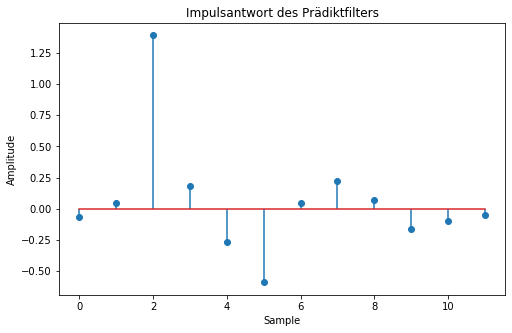

In [3]:
'''
Beispiel: Prädiktfilter bestimmen (selbst definieren)
'''
# Matrix zum Berechnen konstruieren
y = np.matrix(audioSignal, dtype=float).T  # Transfer als Spalte
M = 12  # Ordnung
A = np.matrix(np.zeros((signalLength-M, M)))
for i in range(0, signalLength-M):
    A[i, :] = np.flipud(y[i+np.arange(M)]).T

# Prädiktfilter
h = np.linalg.inv(A.T*A) * A.T * y[np.arange(M, signalLength)] 
h_predict = np.array(np.vstack([0, h]).T)[0]

# Plot
plt.figure(figsize=(8, 5))
plt.title('Impulsantwort des Prädiktfilters')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.stem(h, use_line_collection=True)
plt.show()

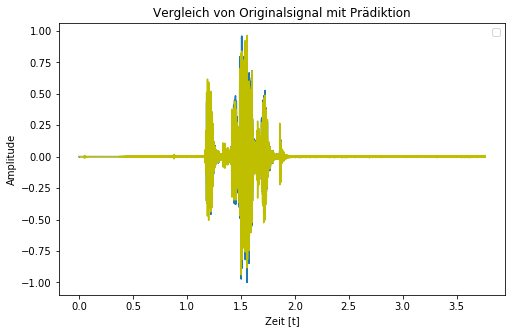

In [4]:
'''
Das originales Audioignal Kodieren
'''
# Prädiktionssignal
audioSignal_predict = sgn.lfilter(h_predict, 1, audioSignal)

# Plot
plt.figure(figsize=(8, 5))
plt.title('Vergleich von Originalsignal mit Prädiktion')
plt.legend(('Original','Prädiktion'), loc='upper right')
plt.xlabel('Zeit [t]')
plt.ylabel('Amplitude')
plt.plot(t_s, audioSignal)
plt.plot(t_s, audioSignal_predict, 'y')
plt.show()

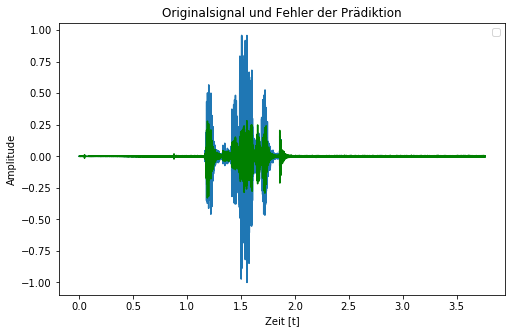

In [5]:
'''
Aufgabe: Fehler berechnen
'''
# Rekonstruktsfilter
h_reconstruct = np.array(np.vstack([1, -h]).T)[0] 

# Fehler als Matrix
error = np.matrix(sgn.lfilter(h_reconstruct, 1 , audioSignal))

# Plot
plt.figure(figsize=(8, 5))
plt.title('Originalsignal und Fehler der Prädiktion')
plt.legend(('Original','Fehler'), loc='upper right')
plt.xlabel('Zeit [t]')
plt.ylabel('Amplitude')
plt.plot(t_s, audioSignal)
plt.plot(t_s, error.T, 'g')
plt.show()

- __Dekodieren__

Beim Dekodieren verwenden wir die umgekehrte Filterstruktur und die entsprechenden Fehler, um das Audioignal zu rekonstruieren:

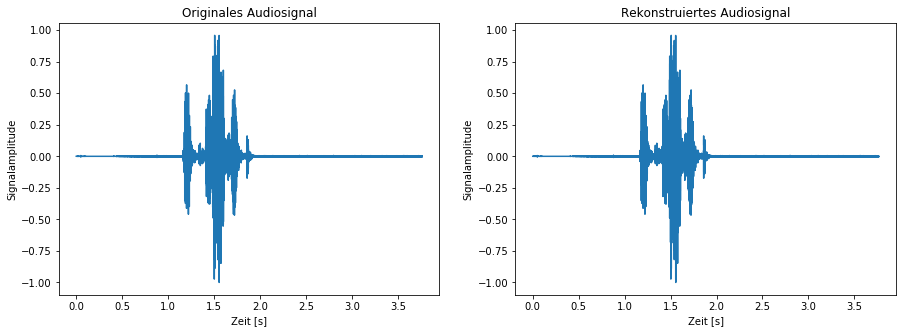

In [6]:
'''
Aufgabe: Audioignal zu rekonstruieren
'''
# Rekonstruiertes Signal
audioSignal_reconstruct = sgn.lfilter([1], h_reconstruct, np.array(error)[0])

# Plot
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Originales Audiosignal')
plt.xlabel('Zeit [s]') 
plt.ylabel('Signalamplitude') 
plt.plot(t_s, audioSignal)
plt.subplot(122)
plt.title('Rekonstruiertes Audiosignal')
plt.xlabel('Zeit [s]') 
plt.ylabel('Signalamplitude') 
plt.plot(t_s, audioSignal_reconstruct)
plt.show()

Das dekodierte, rekonstruierte Aussehen und der Klang sind erwartungsgemäß identisch mit dem Original. Dies bedeutet, dass wir es tatsächlich in einer Encoder-Decoder-Einstellung verwenden können.

----

### References

1. Titelbild von [Justin Stoltzfus](https://www.dataversity.net/voice-processing-are-we-near-new-speech-recognition-apps/#), [Emflazie](https://en.wikipedia.org/wiki/Source%E2%80%93filter_model#/media/File:Source-filter_model_diagram.svg), [adaptivedigital](https://www.adaptivedigital.com/lpc/)   
2. [Linear predictive coding](https://en.wikipedia.org/wiki/Linear_predictive_coding)
3. [Introduction - Linear predictive coding](http://support.ircam.fr/docs/AudioSculpt/3.0/co/LPC.html)  
4. [Advanced Digital Signal Processing
Notebooks and Tutorials](https://github.com/GuitarsAI/ADSP_Tutorials)  